# preprocessing

In [2]:
data = pd.read_csv('data_.csv')
# data_x = data_x.iloc[:, data_x.columns!= 'DE1_dg' ]
# data_y = data_x.iloc[:,data_x.columns=='DE1_dg']

In [15]:
data_xx.to_csv('data_x.csv', index=False)

In [15]:
data_y.loc[data_y['DE1_dg']==8.0,:] = 0
data_y['DE1_dg'].value_counts()

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.0    48660
1.0     4021
Name: DE1_dg, dtype: int64

In [16]:
data_y.to_csv('data_y.csv', index=False)

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
data_pre = StandardScaler().fit(data.iloc[:,data.columns!='DE1_dg'])

In [12]:
data.head(10)

,HE_wt,N_VITC,age,HE_BMI,HE_wc,N_FE,N_B1,N_B2,N_CA,N_CAROT,...,HE_BUN,HE_TG,HE_chol,BM8,BM7,BE3_31,L_OUT_FQ,HE_HBsAg,BD1_11,DE1_dg
0,56.5,28.144062,38.0,22.070312,78.0,9.906326,2.129463,1.162732,354.696362,2123.850327,...,10.2,66.0,186.0,2.0,2.0,8.0,4.0,0.3,8.0,8.0
1,63.7,14.517030,20.0,20.401699,75.0,14.080673,0.560153,0.483796,640.070701,286.469587,...,13.3,94.0,139.0,3.0,3.0,6.0,3.0,0.3,3.0,8.0
2,63.0,138.550033,23.0,21.494781,74.5,21.453717,2.670493,2.015267,595.618808,8277.230522,...,6.7,215.0,175.0,5.0,2.0,8.0,1.0,0.4,5.0,8.0
3,54.9,103.136254,37.0,20.337484,72.4,54.075376,1.028786,0.601815,451.542912,4011.061803,...,14.7,49.0,160.0,5.0,4.0,1.0,2.0,0.3,2.0,8.0
4,91.0,160.457330,30.0,33.792804,100.7,8.966009,0.722666,0.682925,312.266760,10330.283306,...,13.8,96.0,195.0,5.0,5.0,8.0,1.0,0.4,4.0,8.0
5,60.1,0.560718,70.0,26.675532,96.6,0.998063,0.108687,0.043766,19.642663,17.056209,...,26.9,102.0,207.0,2.0,2.0,8.0,5.0,0.3,8.0,8.0
6,56.7,99.117880,41.0,27.496295,83.0,16.572288,1.004673,1.137287,331.439696,5227.723890,...,17.9,74.0,130.0,5.0,5.0,8.0,1.0,0.3,8.0,8.0
7,50.7,39.229149,54.0,21.573651,76.0,6.366494,0.821524,0.397352,239.383662,335.698035,...,12.1,175.0,266.0,2.0,2.0,8.0,2.0,0.4,4.0,8.0
8,68.3,60.960609,21.0,25.117672,84.3,5.660753,0.558477,0.597908,409.751881,788.574381,...,14.3,49.0,202.0,4.0,3.0,4.0,2.0,0.4,4.0,8.0
9,57.6,149.761943,64.0,25.806035,90.2,16.816691,2.687990,2.051522,671.774181,12941.982092,...,14.3,162.0,272.0,5.0,4.0,8.0,2.0,0.4,4.0,1.0


In [5]:
data_x_norm = data_pre.transform(data.iloc[:,data.columns!='DE1_dg'])

In [6]:
np.save('data_x_norm', data_x_norm)

# begin

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# data_x = np.loadtxt('data_x.csv',skiprows=1, delimiter=',')
data_x_norm = np.load('data_x_norm.npy')
data_y = np.loadtxt('data_y.csv', skiprows=1, delimiter=',')


In [3]:
data_y = data_y.reshape(-1,1)

In [4]:
print(data_x_norm.shape)
print(data_y.shape)

(52681, 73)
(52681, 1)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_x_norm, data_y, test_size=0.2)

In [6]:
X = tf.placeholder(tf.float32, shape=(None, 73))
Y = tf.placeholder(tf.float32, shape=(None,1))
training = tf.placeholder(tf.bool)

In [7]:
#layers
L = 5
# units
units=[X.shape[1] ,250,125,62,31,1]   

W1 = tf.get_variable('W1',shape=[units[0],units[1]], initializer= tf.contrib.layers.xavier_initializer())
B1 = tf.Variable(tf.random_normal([units[1]]))
Z1 = tf.matmul(X,W1)+B1
# Z1 = tf.layers.batch_normalization(Z1)
A1 = tf.nn.relu(Z1)
dropout1 = tf.layers.dropout(A1, rate=0.2, training=training)

W2 = tf.get_variable('W2',shape=[ units[1],units[2]], initializer= tf.contrib.layers.variance_scaling_initializer())
B2 = tf.Variable(tf.random_normal([units[2]]))
Z2 = tf.matmul(A1,W2)+B2
Z2 = tf.layers.batch_normalization(Z2)
A2 = tf.nn.relu(Z2)
dropout2 = tf.layers.dropout(A2, rate=0.2, training=training)

W3 = tf.get_variable('W3',shape=[ units[2],units[3]], initializer= tf.contrib.layers.variance_scaling_initializer())
B3 = tf.Variable(tf.random_normal([units[3]]))
Z3 = tf.matmul(A2,W3)+B3
Z3 = tf.layers.batch_normalization(Z3)
A3 = tf.nn.relu(Z3)
dropout3 = tf.layers.dropout(A3, rate=0.2, training=training)

W4 = tf.get_variable('W4',shape=[ units[3],units[4]], initializer= tf.contrib.layers.variance_scaling_initializer())
B4 = tf.Variable(tf.random_normal([units[4]]))
Z4 = tf.matmul(A3,W4)+B4
A4 = tf.nn.relu(Z4)
dropout4 = tf.layers.dropout(A4, rate=0.2, training=training)

W5 = tf.get_variable('W5', shape = [units[4], units[5]], initializer = tf.contrib.layers.variance_scaling_initializer())
B5 = tf.Variable(tf.random_normal([units[5]]))
Z5 = tf.matmul(A4,W5)+B5

logits = tf.nn.sigmoid(Z5)

# cost = tf.reduce_mean(tf.matmul(tf.log(tf.transpose(logits)),Y) + 
#                                  tf.matmul(tf.log(1-tf.transpose(logits)),(1-Y)))
cost = tf.reduce_mean(tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(labels= Y, logits=Z5)))
# cost = -tf.reduce_mean(tf.reduce_sum((Y * tf.log(logits)) + ((1-Y) * tf.log(1-logits))))
# cost = -tf.reduce_mean(Y * tf.log(logits) + (1 - Y) * tf.log(1 - logits),axis=0)
# cost  = -tf.reduce_mean(tf.reduce_sum(Y * tf.log(logits),axis=1))

optimizer = tf.train.AdamOptimizer(0.005).minimize(cost)

# predicted = tf.nn.sigmoid(Z5)
# correct_pred = tf.equal(tf.round(predicted), Y)
# accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [45]:

# sess = tf.Session()
# sess.run(tf.global_variables_initializer())
# mini -> 128 ->500
mini = 500
n_mini = 1500//mini
for i in range(1500):
    for j in range(n_mini):
        c , _ = sess.run([cost, optimizer], 
                         feed_dict={X: X_train[j * mini : (j+1) * mini], Y: y_train[j * mini : (j+1) * mini],
                                   training:True})
    c , _ = sess.run([cost, optimizer], 
                         feed_dict={X: X_train[n_mini * mini :], Y: y_train[n_mini * mini :],
                                   training:True})
    
    if i%100==0:
        print('iter : {}, cost : {}'.format(i,c))

iter : 0, cost : 19.633949279785156
iter : 100, cost : 18.661846160888672
iter : 200, cost : 18.58959197998047
iter : 300, cost : 11.12685489654541
iter : 400, cost : 10.4171142578125
iter : 500, cost : 10.12913990020752
iter : 600, cost : 10.366851806640625
iter : 700, cost : 7.059657573699951
iter : 800, cost : 7.055397987365723
iter : 900, cost : 7.054274082183838
iter : 1000, cost : 7.053788185119629
iter : 1100, cost : 7.053477764129639
iter : 1200, cost : 7.053239822387695
iter : 1300, cost : 7.053056716918945
iter : 1400, cost : 7.052919387817383


In [50]:
yhat_test = sess.run(tf.round(tf.nn.sigmoid(Z5)), feed_dict={X:X_test, training:False})

In [51]:
#accuracy
np.mean(np.equal(yhat_test,y_test))

0.9138274651229003

In [52]:
#f1 score
f1_score(y_test,yhat_test)

0.33915574963609896

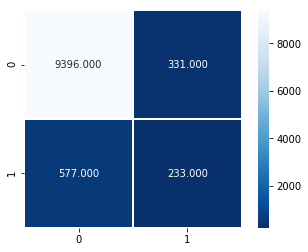

In [53]:
# confusion matrix
cm = confusion_matrix(y_test, yhat_test)
sns.heatmap(cm,annot=True,fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

In [43]:
#model save
saver = tf.train.Saver()
saver.save(sess,'c:/users/nb-0242/jupyter/PHR_DNN')

'c:/users/nb-0242/jupyter/PHR_DNN'